In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("C://Users//admin//Desktop//CLUSTERING//ExcelR//EastWestAirlines.csv")
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
print(df.columns)

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [11]:
scaler = MinMaxScaler()

#scaler.fit(df[['City']])
#df['City'] = scaler.transform(df[['City']])

scaler.fit(df[['Balance']])
df['Balance'] = scaler.transform(df[['Balance']])

scaler.fit(df[['Qual_miles']])
df['Qual_miles)'] = scaler.transform(df[['Qual_miles']])

scaler.fit(df[['cc1_miles']])
df['cc1_miles'] = scaler.transform(df[['cc1_miles']])

scaler.fit(df[['cc2_miles']])
df['cc2_miles'] = scaler.transform(df[['cc2_miles']])

scaler.fit(df[['cc3_miles']])
df['cc3_miles'] = scaler.transform(df[['cc3_miles']])


scaler.fit(df[['Bonus_miles']])
df['Bonus_miles'] = scaler.transform(df[['Bonus_miles']])


scaler.fit(df[['Flight_miles_12mo']])
df['Flight_miles_12mo'] = scaler.transform(df[['Flight_miles_12mo']])


scaler.fit(df[['Flight_trans_12']])
df['Flight_trans_12'] = scaler.transform(df[['Flight_trans_12']])


scaler.fit(df[['Days_since_enroll']])
df['Days_since_enroll'] = scaler.transform(df[['Days_since_enroll']])


scaler.fit(df[['Award?']])
df['Award?'] = scaler.transform(df[['Award?']])




C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'verts' kwarg was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use 'marker' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: 'Series' objects are mutable, thus they cannot be hashed

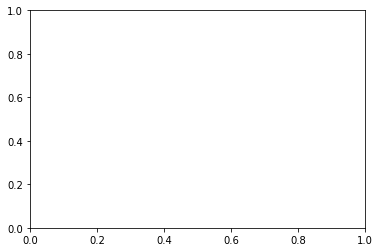

In [21]:
plt.scatter(df.ID, df.Balance, df.Qual_miles, df.cc1_miles, df.cc2_miles, df.cc3_miles,
       df.Bonus_miles, df.Bonus_trans, df.Flight_miles_12mo, df.Flight_trans_12,
       df.Days_since_enroll, df['Award?'])

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']])
    sse.append(km.inertia_)

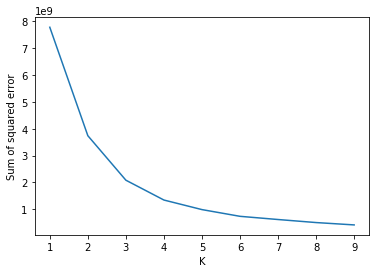

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [25]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
df['cluster']=y_predicted
df.head()


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Qual_miles),cluster
0,1,0.016508,0,0.00,0.0,0.0,0.000660,1,0.000000,0.000000,0.843742,0.0,0.0,0
1,2,0.011288,0,0.00,0.0,0.0,0.000815,2,0.000000,0.000000,0.839884,0.0,0.0,0
2,3,0.024257,0,0.00,0.0,0.0,0.015636,4,0.000000,0.000000,0.847842,0.0,0.0,0
3,4,0.008667,0,0.00,0.0,0.0,0.001896,1,0.000000,0.000000,0.837955,0.0,0.0,0
4,5,0.057338,0,0.75,0.0,0.0,0.164211,26,0.067398,0.075472,0.835905,1.0,0.0,0


In [27]:
km.cluster_centers_

array([[6.65802948e+02, 5.81938295e-02, 4.83925524e+01, 3.49495733e-01,
        5.43056633e-03, 4.26687355e-03, 8.62953103e-02, 1.30884407e+01,
        1.54278694e-02, 2.87044220e-02, 7.83662393e-01, 4.47633825e-01],
       [3.35200457e+03, 2.69535840e-02, 3.74135567e+01, 1.67174410e-01,
        9.52018279e-03, 1.71363290e-03, 4.30058362e-02, 1.00472201e+01,
        1.41042418e-02, 2.39118251e-02, 2.23134627e-01, 2.61995430e-01],
       [1.95658947e+03, 8.23605466e-02, 4.37557895e+03, 2.78947368e-01,
        1.12757026e-17, 3.46944695e-18, 8.00348103e-02, 1.37263158e+01,
        4.23751074e-02, 7.48758689e-02, 5.01404947e-01, 6.00000000e-01],
       [2.00613287e+03, 4.17963273e-02, 3.77357911e+01, 2.78609831e-01,
        7.29646697e-03, 3.45622120e-03, 6.50622701e-02, 1.15430108e+01,
        1.32631225e-02, 2.16068168e-02, 4.86999097e-01, 3.86328725e-01]])

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'verts' kwarg was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use 'marker' instead.
  import sys


TypeError: 'Series' objects are mutable, thus they cannot be hashed

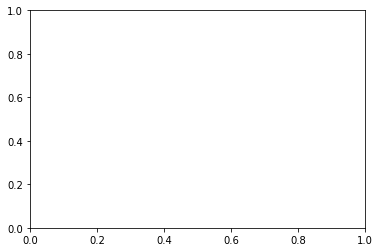

In [28]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df.ID, df.Balance, df.Qual_miles, df.cc1_miles, df.cc2_miles, df.cc3_miles,
       df.Bonus_miles, df.Bonus_trans, df.Flight_miles_12mo, df.Flight_trans_12,
       df.Days_since_enroll, df['Award?'])
plt.scatter(df.ID, df.Balance, df.Qual_miles, df.cc1_miles, df.cc2_miles, df.cc3_miles,
       df.Bonus_miles, df.Bonus_trans, df.Flight_miles_12mo, df.Flight_trans_12,
       df.Days_since_enroll, df['Award?'])
plt.scatter(df.ID, df.Balance, df.Qual_miles, df.cc1_miles, df.cc2_miles, df.cc3_miles,
       df.Bonus_miles, df.Bonus_trans, df.Flight_miles_12mo, df.Flight_trans_12,
       df.Days_since_enroll, df['Award?'])
plt.scatter(df.ID, df.Balance, df.Qual_miles, df.cc1_miles, df.cc2_miles, df.cc3_miles,
       df.Bonus_miles, df.Bonus_trans, df.Flight_miles_12mo, df.Flight_trans_12,
       df.Days_since_enroll, df['Award?'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()